In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
np.random.seed(0)

### Definition

In [2]:
X = np.random.rand(400).reshape(100, 4)
U, S, V = np.linalg.svd(X, full_matrices = False)
U.shape, S.shape, V.shape

((100, 4), (4,), (4, 4))

### Image Compression

Image Shape: (1467, 2048), Numel: 3004416


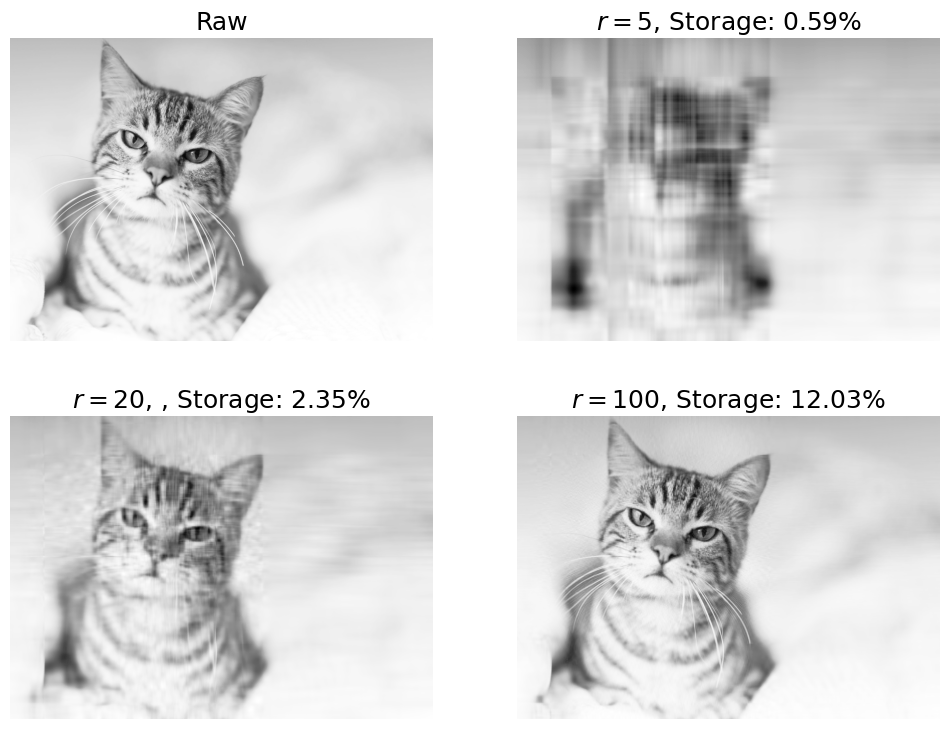

In [7]:
img = np.array(Image.open('./data/SVD/cat.jpg').convert('L'))
numel = np.prod(img.shape)
print(f'Image Shape: {img.shape}, Numel: {numel}')

U, S, V = np.linalg.svd(img, full_matrices = False)
def compress_img(idx):
    compressed_img = U[:, :idx] @ np.diag(S[:idx]) @ V[:idx]
    loss = np.linalg.norm(img - compressed_img)**2 / numel
    size = U[:, :idx].size + np.diag(S[:idx]).size + V[:idx].size
    return compressed_img, loss, size

fig = plt.figure(figsize = (12, 9))
fontsize = 18

plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img, cmap='Greys_r')
plt.title('Raw', fontsize = fontsize)

plt.subplot(2, 2, 2)
plt.axis('off')
compressed_img, loss, size = compress_img(5)
plt.title(f'$r = 5$, Storage: {size / numel * 100:4.2f}%', fontsize = fontsize)
plt.imshow(compressed_img, cmap='Greys_r')

plt.subplot(2, 2, 3)
plt.axis('off')
compressed_img, loss, size = compress_img(20)
plt.title(f'$r = 20$, , Storage: {size / numel * 100:4.2f}%', fontsize = fontsize)
plt.imshow(compressed_img, cmap='Greys_r')

plt.subplot(2, 2, 4)
plt.axis('off')
compressed_img, loss, size = compress_img(100)
plt.title(f'$r = 100$, Storage: {size / numel * 100:4.2f}%', fontsize = fontsize)
plt.imshow(compressed_img, cmap='Greys_r')

plt.savefig(
    './experiment_results/SVD/img_compress_svd.pdf', 
    bbox_inches = 'tight', 
    pad_inches = 0.03
)
plt.show()

Singular values & Cumulative Energy

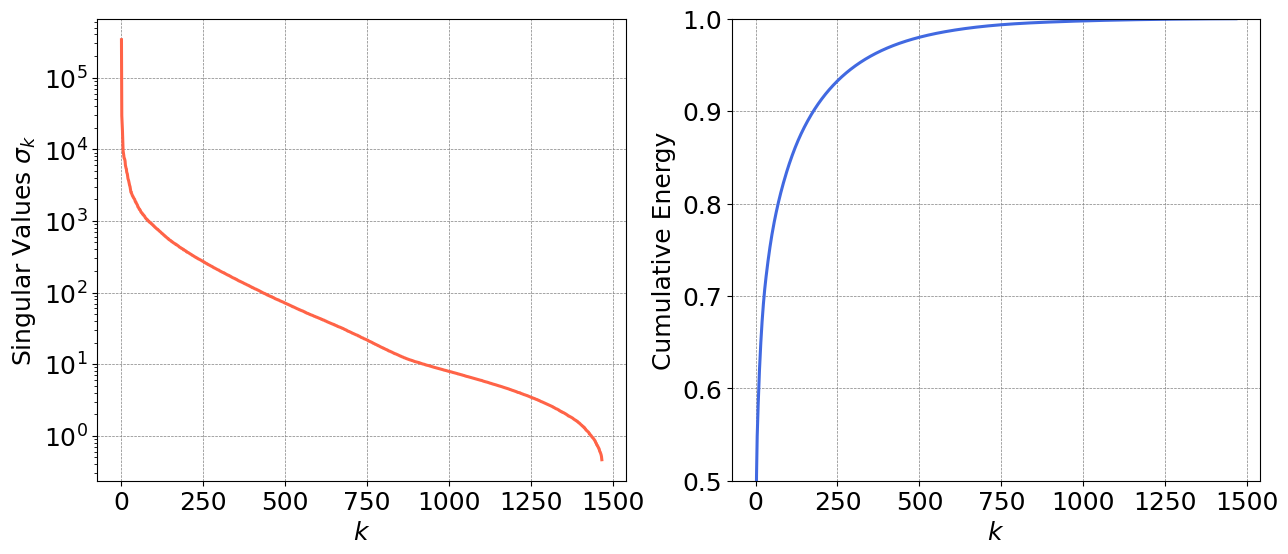

In [28]:
fig = plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(S, lw = 2.2, color = 'tomato')
plt.yscale('log')
plt.xlabel('$k$', fontsize = fontsize)
plt.ylabel('Singular Values $\\sigma_k$', fontsize = fontsize)
plt.tick_params(axis = 'both', labelsize = fontsize)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.subplot(1, 2, 2)
energy = [np.sum(S[:i]) / S.sum() for i in range(len(S))]
plt.plot(energy, lw = 2.2, color = 'royalblue')
plt.yscale('linear')
plt.xlabel('$k$', fontsize = fontsize)
plt.ylim([0.5, 1.0])
plt.ylabel('Cumulative Energy', fontsize = fontsize)
plt.tick_params(axis = 'both', labelsize = fontsize)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)

plt.savefig(
    './experiment_results/SVD/img_compress_sigma.pdf', 
    bbox_inches = 'tight', 
    pad_inches = 0.03
)
plt.show()